# FWHM Analysis

In [12]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib as mpl
from matplotlib import cm
import math
import scipy.optimize as opt
import os


pixel_size = 3.45 # in micrometer
sigma_to_FWHM = 2.3548
Output_folder = 'Outputs'
mpl.rcParams.update({'font.size': 10})

In [4]:
def gaussian_function(x, a, b, sigma):
    return a * np.exp( (-1/2) * ((x-b) / sigma)**2)

In [5]:
def twoD_Gaussian(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    theta = 0
    offset = 0
    x, y = xy
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

In [9]:
def gauss_2d_fit(input_beam_data, Amplitude, x0, y0, sigma_x, sigma_y, theta=0, offset=0, x_lim=[0,1439], y_lim=[0,1079], Output_folder = Output_folder, file_name="test",position = "L1"):
    #2D Fitting , position ekledim ,sol üstteki legendte ne yazacağı,

    initial_guess = (Amplitude, x0, y0, sigma_x, sigma_y, theta, offset) # (amplitude_x, amplitude_y, x0, y0, sigma_x, sigma_y, theta, offset)
    x = np.linspace(0, 1439, 1440); y = np.linspace(0, 1079, 1080)
    x, y = np.meshgrid(x, y)

    popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), input_beam_data.ravel(), p0=initial_guess, maxfev=10000)
    data_fitted = twoD_Gaussian((x, y), *popt)
    sigma_x = popt[3]; sigma_y = popt[4] 

    plt.figure(num=None, figsize=(8, 6), dpi=120)
    plt.imshow(input_beam_data.ravel().reshape(1080, 1440), cmap='gray', origin='lower',
        extent=(x.min(), x.max(), y.min(), y.max()))
    plt.contour(x, y, data_fitted.reshape(1080, 1440), 4, colors='g', linewidths=1, linestyles='dashed')#fitteki halka sayısı
    

    #plt.annotate("Sigma x = %f µm" %(sigma_x*pixel_size), (x_lim[0]+3, y_lim[0]+80), color="g")
    #plt.annotate("Sigma y = %f µm" %(sigma_y*pixel_size), (x_lim[0]+3, y_lim[0]+20), color="g")
    
    plt.xlabel("Pixel (3.45 µm)"); plt.ylabel("Pixel (3.45 µm)")
    
    plt.ylim(y_lim); plt.xlim(x_lim)
    
    #2 tane legend eklemek için değişiklerler yapıldı
    
    legend1 = plt.legend(title="FWHM\nx = %.1f µm\ny = %.1f µm"
               %(sigma_x*sigma_to_FWHM*pixel_size, sigma_y*sigma_to_FWHM*pixel_size))

    # Add the first legend to the current axes
    plt.gca().add_artist(legend1)
    
    # Create a new legend for specific lines
    legend2 = plt.legend(title=position, loc='upper left')

    # Add the second legend to the current axes
    plt.gca().add_artist(legend2)
    
    plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", "_fit.png"), bbox_inches='tight',pad_inches=0.01)
    
    plt.show()

In [10]:
def find_index_of_max_intensity(list_to_check, item_to_find,input_beam_data,max_order = 1):
    indices = []
    max_array=[]
    list_to_check_int = [int(x) for x in list_to_check]
    for idx, value in enumerate(list_to_check_int):
        if value == item_to_find:
            indices.append(idx)
    for i in indices:
        max_array.append(max(input_beam_data[:,i])) 
    index = max_array.index(max(max_array))
    return indices[index]
    



## Without 50mm Lens Without 200 mm Lens

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


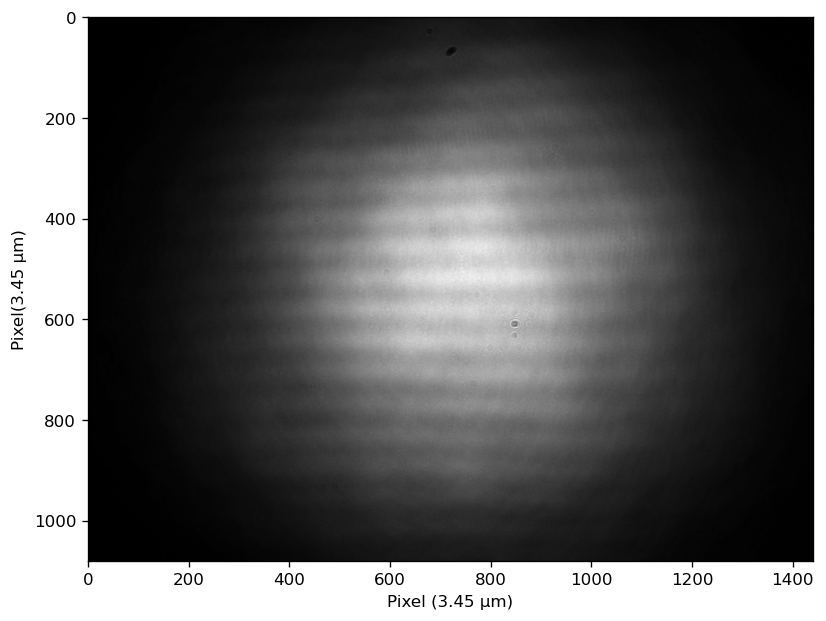

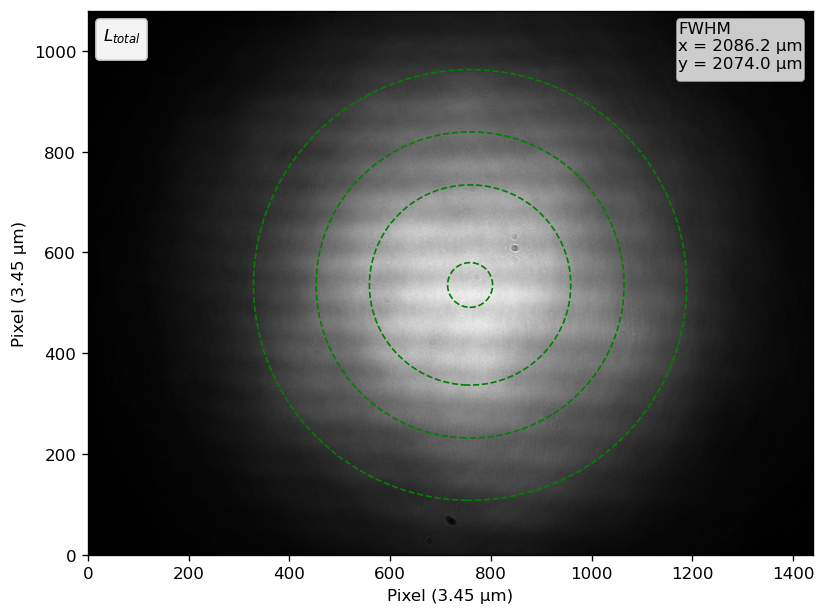

In [6]:
file_name = "2500ms_wout_50mm_lens_wout_200mm_lens_cam2_633nm_2_r.txt"

#Load data
input_beam_data = np.loadtxt(file_name)
input_beam_data = np.array(input_beam_data ,dtype="uint8")
input_beam_img =Image.fromarray(input_beam_data,mode="L")
plt.figure(num=None, figsize=(8, 6), dpi=120) 
plt.xlabel("Pixel (3.45 µm)"); plt.ylabel("Pixel(3.45 µm)")
plt.imshow(input_beam_img, cmap="gray")
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')



#2D Fitting
gauss_2d_fit(input_beam_data, Amplitude = 200, x0=800, y0=600, sigma_x= 250, sigma_y=250, theta=0, offset=0, file_name=file_name,position=r'$L_{total}$')



## Without 50mm Lens with 200mm Lens

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


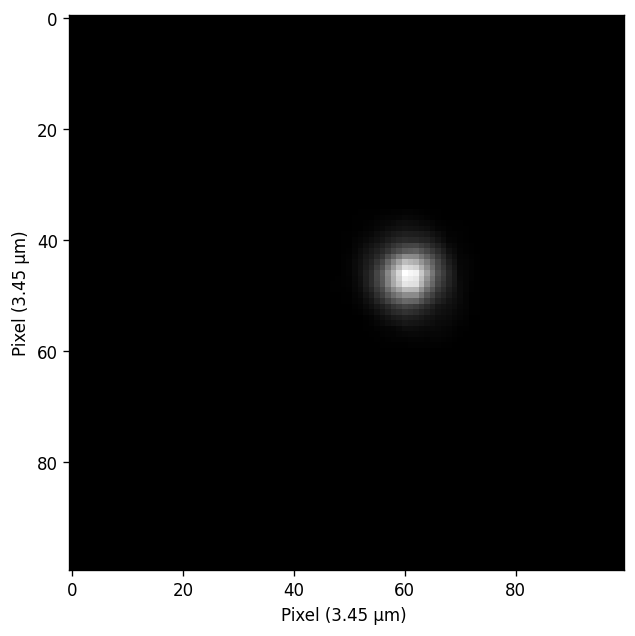

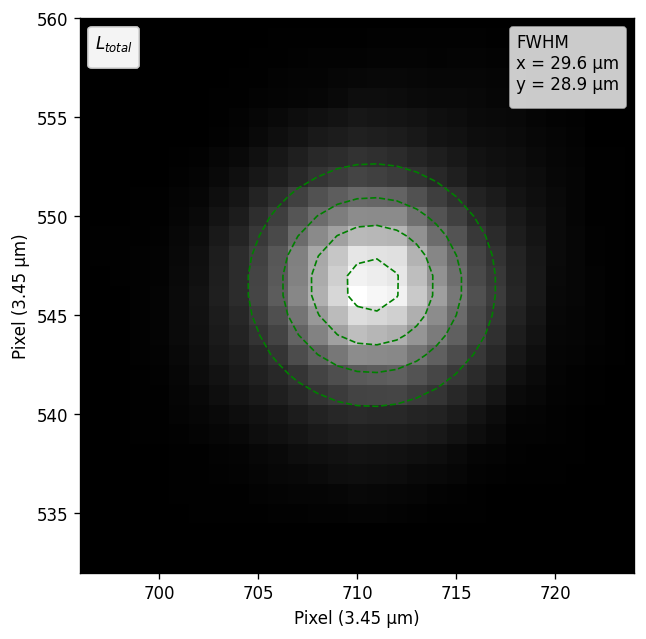

In [11]:


file_name = "900ms_wout_50mm_lens_200mm_lens_cam2_633nm_2_r.txt"

#Load data
input_beam_data = np.loadtxt(file_name)
input_beam_data = np.array(input_beam_data ,dtype="uint8")
input_beam_img =Image.fromarray(input_beam_data[500:600,650:750],mode="L")
plt.figure(num=None, figsize=(8, 6), dpi=120)
plt.xlabel("Pixel (3.45 µm) "); plt.ylabel("Pixel (3.45 µm)")
plt.imshow(input_beam_img, cmap="gray")
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')



#2D Fitting

gauss_2d_fit(input_beam_data, Amplitude = 10, x0=700, y0=550, sigma_x= 10, sigma_y=10, theta=0, offset=0,
x_lim = [696,724], y_lim = [532,560], file_name=file_name,position=r'$L_{total}$') 


## Before BS 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


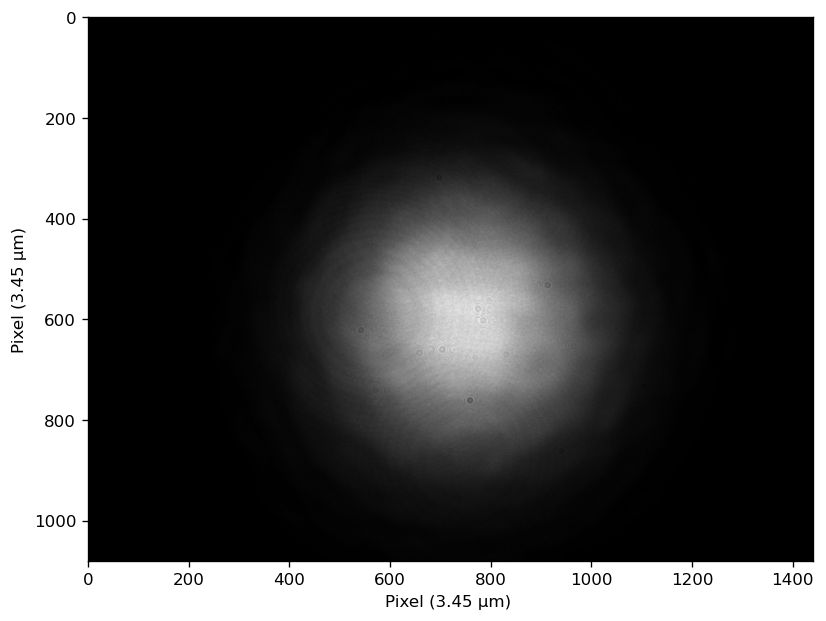

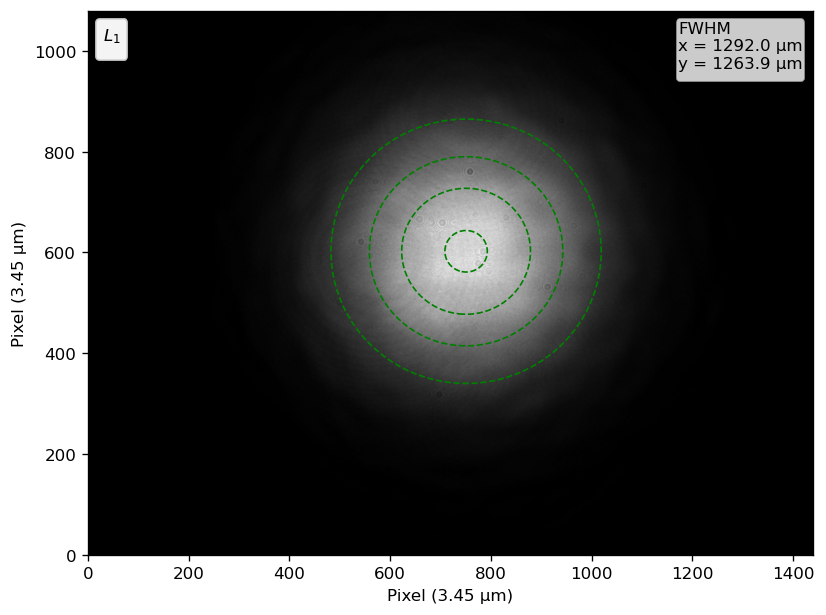

In [8]:
file_name = "7500ms_before_bs_cam1_633nm_r.txt"

#Load data
input_beam_data = np.loadtxt(file_name)
input_beam_data = np.array(input_beam_data ,dtype="uint8")
input_beam_img =Image.fromarray(input_beam_data,mode="L")
plt.figure(num=None, figsize=(8, 6), dpi=120)
plt.xlabel("Pixel (3.45 µm) "); plt.ylabel("Pixel (3.45 µm)")
plt.imshow(input_beam_img, cmap="gray")
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')



#2D Fitting

gauss_2d_fit(input_beam_data, Amplitude = 200, x0=750, y0=550, sigma_x= 150, sigma_y=150, theta=0, offset=0, file_name=file_name,position=r'$L_{1}$')


## 50mm Lens without 200mm Lens

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


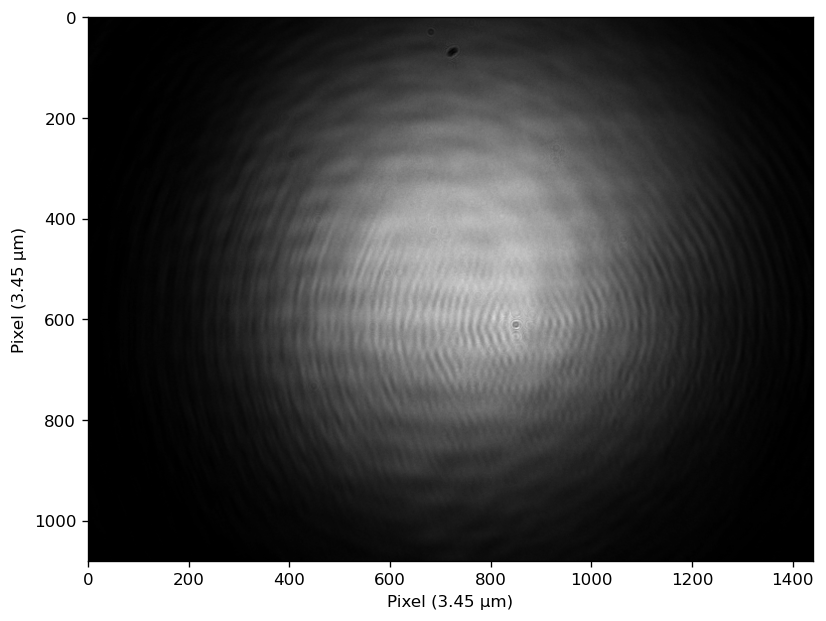

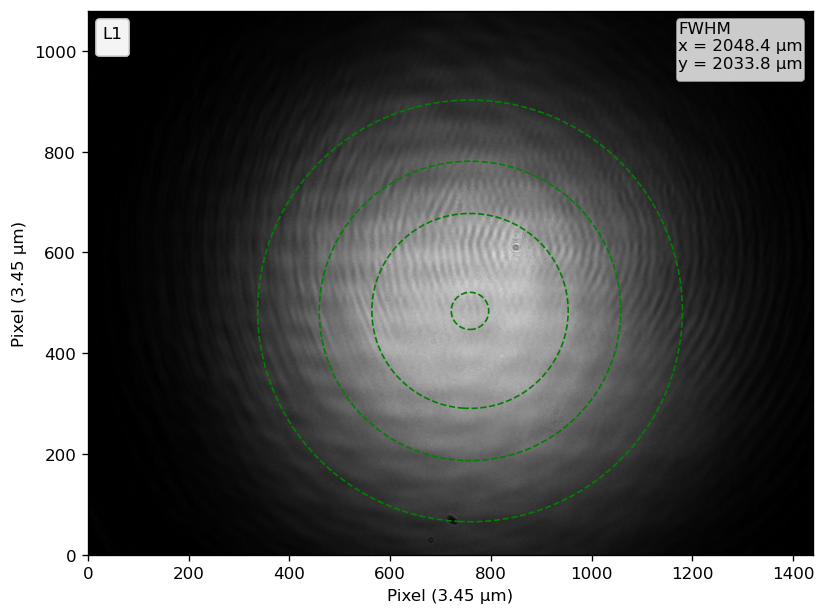

In [9]:
file_name = "25000ms_50mm_lens_wout_200mm_lens_cam2_633nm_2_r.txt"

#Load data
input_beam_data = np.loadtxt(file_name)
input_beam_data = np.array(input_beam_data ,dtype="uint8")
input_beam_img =Image.fromarray(input_beam_data,mode="L")
plt.figure(num=None, figsize=(8, 6), dpi=120)
plt.xlabel("Pixel (3.45 µm)"); plt.ylabel("Pixel (3.45 µm)")
plt.imshow(input_beam_img, cmap="gray")
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')



#2D Fitting
gauss_2d_fit(input_beam_data, Amplitude = 200, x0=750, y0=500, sigma_x= 250, sigma_y=250, theta=0, offset=0, file_name=file_name)

## 50mm Lens with 200mm Lens

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


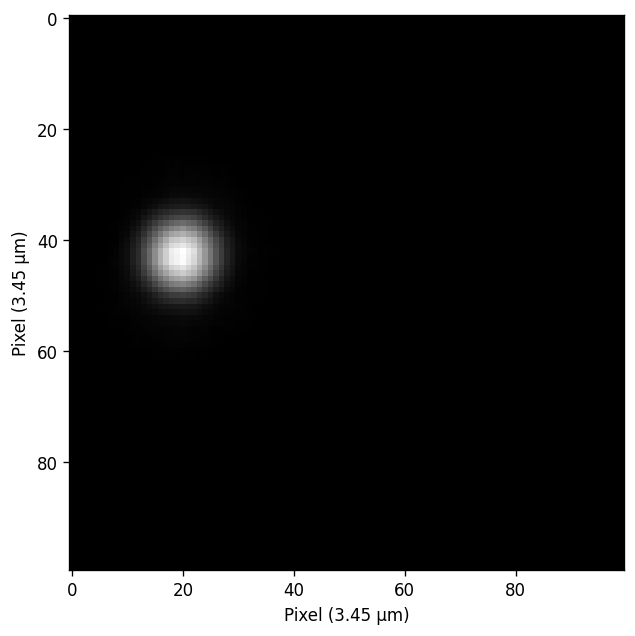

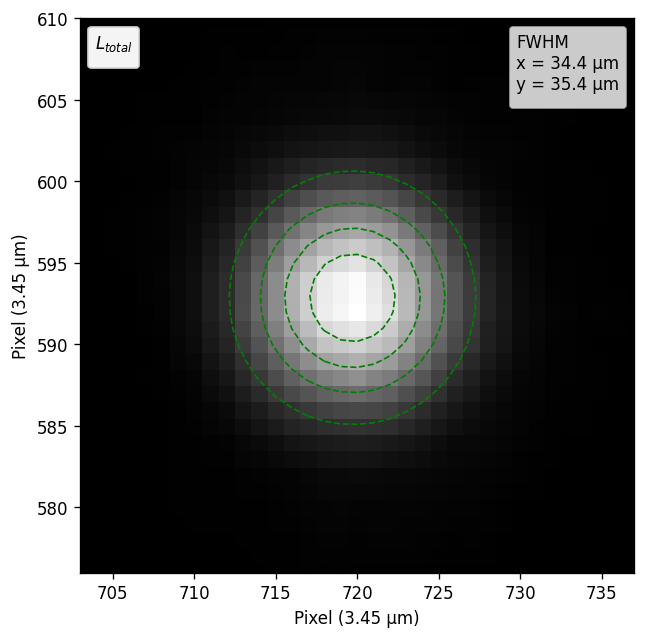

In [13]:
file_name = "1500ms_50mm_lens_200mm_lens_cam2_633nm_2_r.txt"

#Load data
input_beam_data = np.loadtxt(file_name)
input_beam_data = np.array(input_beam_data ,dtype="uint8")
input_beam_img =Image.fromarray(input_beam_data[550:650,700:800],mode="L")
plt.figure(num=None, figsize=(8, 6), dpi=120)
plt.xlabel("Pixel (3.45 µm)"); plt.ylabel("Pixel (3.45 µm)")
plt.imshow(input_beam_img, cmap="gray")

plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')


#2D Fitting
gauss_2d_fit(input_beam_data, Amplitude = 10, x0=720, y0=590, sigma_x= 10, sigma_y=10, theta=0, offset=0, 
             x_lim=[703,737], y_lim=[576,610], file_name=file_name,position=r'$L_{total}$')


## At 50mm Lens

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


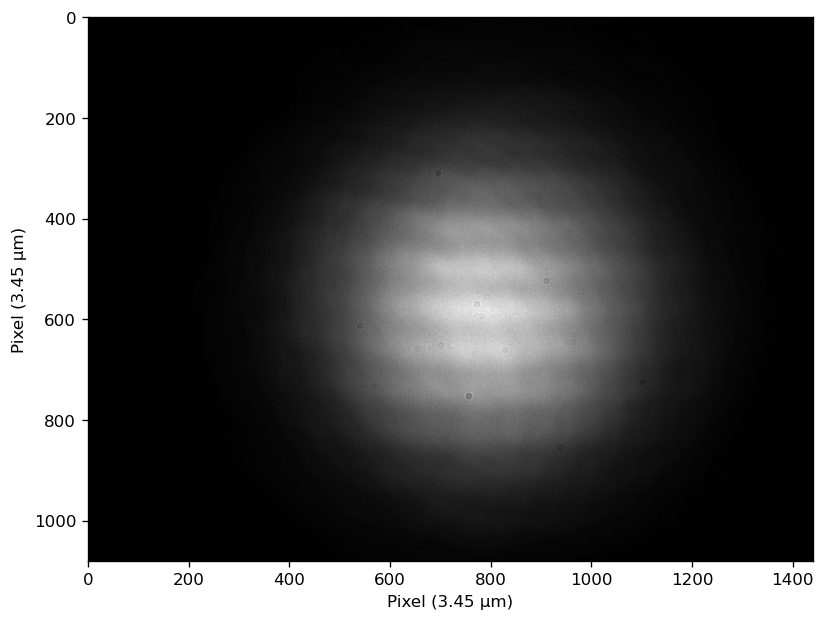

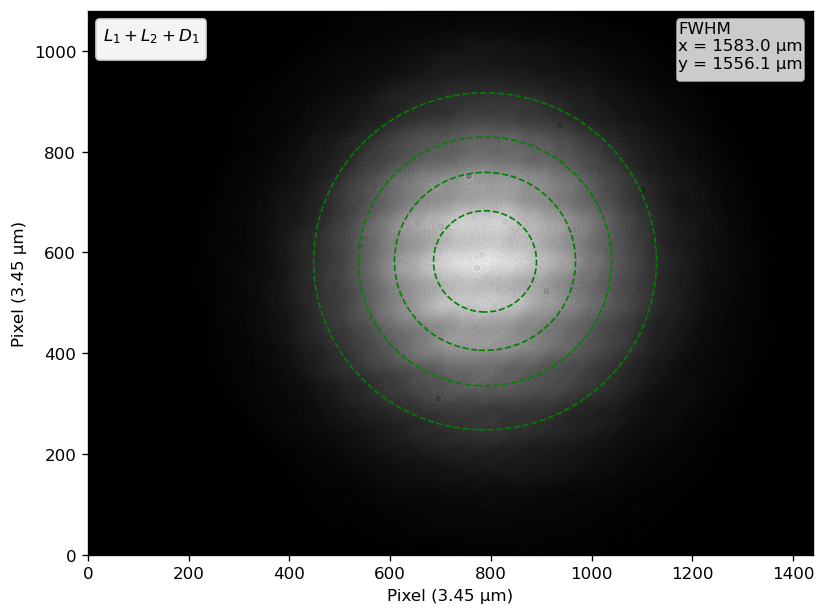

In [11]:
file_name = "24000ms_at_objective_cam1_633nm_r.txt"

#Load data
input_beam_data = np.loadtxt(file_name)
input_beam_data = np.array(input_beam_data ,dtype="uint8")
input_beam_img =Image.fromarray(input_beam_data,mode="L")
plt.figure(num=None, figsize=(8, 6), dpi=120)
plt.xlabel("Pixel (3.45 µm)"); plt.ylabel("Pixel (3.45 µm)")
plt.imshow(input_beam_img, cmap="gray")
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')


    
    

#2D Fitting

gauss_2d_fit(input_beam_data, Amplitude = 200, x0=800, y0=550, sigma_x= 200, sigma_y=200, theta=0, offset=0, file_name=file_name,position=r'$L_{1}+L_{2}+D_{1}$')



## After 50mm lens

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


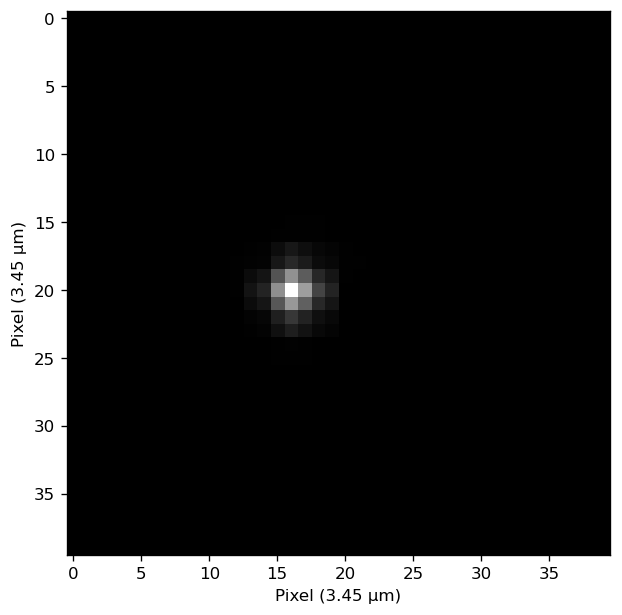

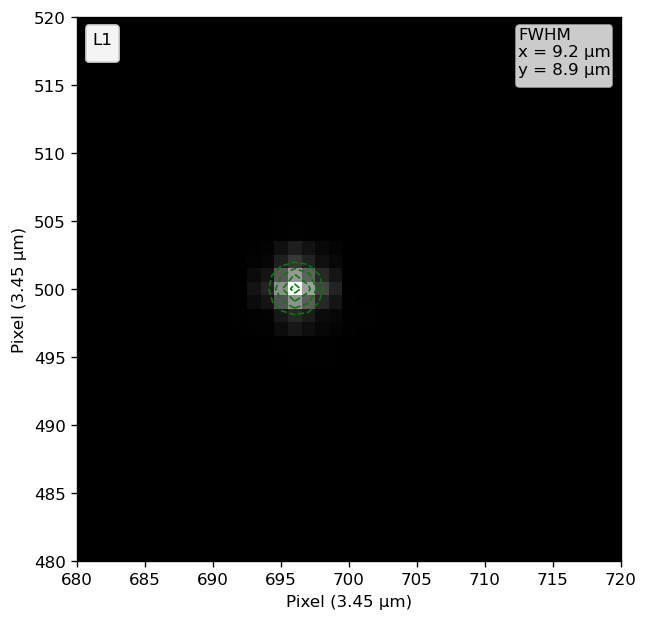

In [12]:
file_name = "0.04ms_after_objective_cam1_633nm_r.txt"

#Load data
input_beam_data = np.loadtxt(file_name)
input_beam_data = np.array(input_beam_data ,dtype="uint8")
input_beam_img =Image.fromarray(input_beam_data[480:520,680:720],mode="L")
plt.figure(num=None, figsize=(8, 6), dpi=120)
plt.xlabel("Pixel (3.45 µm)"); plt.ylabel("Pixel (3.45 µm)")
plt.imshow(input_beam_img, cmap="gray")
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')


    
    

#2D Fitting


gauss_2d_fit(input_beam_data, Amplitude = 10, x0=695, y0=500, sigma_x= 10, sigma_y=10, theta=0, offset=0, 
             x_lim=[680,720], y_lim=[480,520], file_name=file_name)


# PPTX To Photo

In [1]:
from pptx import Presentation
from pptx.util import Inches
import win32com
import win32com.client
import sys
import glob
from PIL import ImageOps

In [2]:
Application = win32com.client.Dispatch("PowerPoint.Application")
Presentation = Application.Presentations.Open(r"G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic.pptx")
Presentation.Slides[0].Export(r"G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide1.jpg", "JPG")




#Presentation
#Presentation.Slides[1].Export(r"G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide2.jpg", "JPG")

#-------Croping image-----------------------------------------------
img = Image.open(r'G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide2.jpg')
img.load()
imageSize = img.size  
# remove alpha channel
invert_im = img.convert("RGB") 
# invert image (so that white is 0)
invert_im = ImageOps.invert(invert_im)
imageBox = invert_im.getbbox()
cropped=img.crop(imageBox)    
cropped.save(r'G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide2.jpg')
#-------------------------------------------------------------------


Presentation.Slides[2].Export(r"G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide3.jpg", "JPG")

#-------Croping image-----------------------------------------------
img = Image.open(r'G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide3.jpg')
img.load()
imageSize = img.size
    
# remove alpha channel
invert_im = img.convert("RGB") 
    
# invert image (so that white is 0)
invert_im = ImageOps.invert(invert_im)
imageBox = invert_im.getbbox()
    
cropped=img.crop(imageBox)
cropped.save(r'G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide3.jpg')
#-------------------------------------------------------------------

Presentation.Slides[3].Export(r"G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide4.jpg", "JPG")
#Croping image
img = Image.open(r'G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide4.jpg')
img2 = img.crop((left, top, right, bottom))
img2.save(r'G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide4.jpg')

Presentation.Slides[4].Export(r"G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide5.jpg", "JPG")
#Croping image
img = Image.open(r'G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide5.jpg')
img2 = img.crop((left, top, right, bottom))
img2.save(r'G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide5.jpg')

Presentation.Slides[5].Export(r"G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide6.jpg", "JPG")
#Croping image
img = Image.open(r'G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide6.jpg')
img2 = img.crop((left, top, right, bottom))
img2.save(r'G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide6.jpg')

Application.Quit()
Presentation =  None
Application = None

com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024893), None)

# Simulation

In [15]:
mpl.rcParams.update(mpl.rcParamsDefault)

figsize = (6,5); 

# Fonts
plt_label_size = 12; legend_font_size = plt_label_size*1 ; 

# Line thicknesses
axes_linewidth = 3; lines_linewidth = axes_linewidth; 

# Tick sizes
major_tick_size = 6; minor_tick_size = major_tick_size / 2; tick_width = major_tick_size / 4

kw_args = { 'figure.figsize' : figsize, # 'font.family' : 'cursive', # 'font.monospace' : 'Fixed',
           
            'axes.linewidth': axes_linewidth, 'lines.linewidth': lines_linewidth, 'axes.labelsize' : plt_label_size, 
           
            'axes.grid' : True, 'grid.alpha' : 0.25, 'grid.color' :  'gray', 'grid.linestyle': '--',
           
            'legend.fontsize': legend_font_size,  'legend.title_fontsize' : legend_font_size, 
            
           
            'xtick.direction':'in', 'xtick.major.size' : major_tick_size, 'xtick.major.width': tick_width, 'xtick.major.pad': major_tick_size, 
            'xtick.minor.size' : minor_tick_size, 'xtick.minor.width': tick_width, 'xtick.labelsize': plt_label_size, 'xtick.minor.visible': True,
            'xtick.color' : 'k', 'xtick.top': True,
             
            'ytick.direction':'in', 'ytick.major.size' : major_tick_size, 'ytick.major.width': tick_width, 'ytick.major.pad': major_tick_size,
            'ytick.minor.size' : minor_tick_size, 'ytick.minor.width': tick_width, 'ytick.labelsize': plt_label_size,  'ytick.minor.visible': True,
            'ytick.color' : 'k', 'ytick.right': True,
           
           'savefig.bbox': "tight"
            
           }

plt.rcParams.update(kw_args)

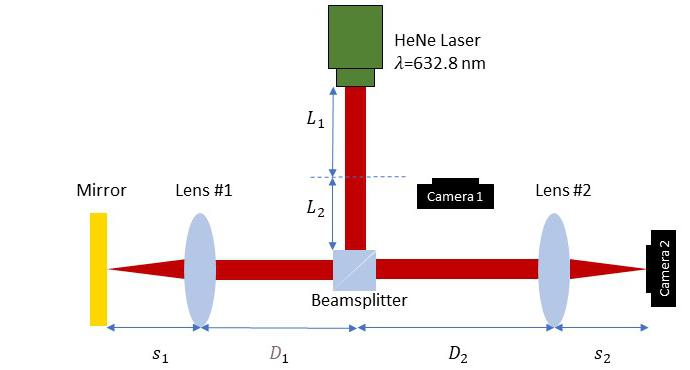

In [16]:
from IPython.display import Image
Image(filename=r"G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically Thin Optical Elements\Setup Schematic\Setup Schematic\Slide2.jpg") 

In [17]:
#Import
from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.utils_drawing import draw_several_fields
from diffractio.utils_optics import beam_width_1D, FWHM2D, MTF_ideal, MTF_parameters,FWHM1D
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
import math
import matplotlib.pyplot as plt
import matplotlib

In [18]:
# Parameters 

#Gaussian Beam

wavelength =  0.6328 * um
w0 = 0.35821143204247774 # mm https://www.thorlabs.com/thorproduct.cfm?partnumber=HNL100R#ad-image-0

#Sample Size

num_sample=  500000


#Second Lens 

second_lens_diameter = 25.4 * mm
range_of_second_lens = np.linspace(-second_lens_diameter/2 , second_lens_diameter/2 , num_sample)
focal_length_second_lens = 200 * mm

second_lens = Scalar_mask_X(x=range_of_second_lens, wavelength=wavelength)
second_lens.lens(x0=0.0, focal=focal_length_second_lens, radius=second_lens_diameter/ 2)


#First Lens

first_lens_diameter = 25.4 * mm
focal_length_first_lens = 50 * mm

first_lens = Scalar_mask_X(x=range_of_second_lens, wavelength=wavelength)
first_lens.lens(x0=0.0, focal=focal_length_first_lens, radius=first_lens_diameter/ 2)


array([1.      , 0.999992, 0.999984, ..., 0.999984, 0.999992, 1.      ])

## Laser Output

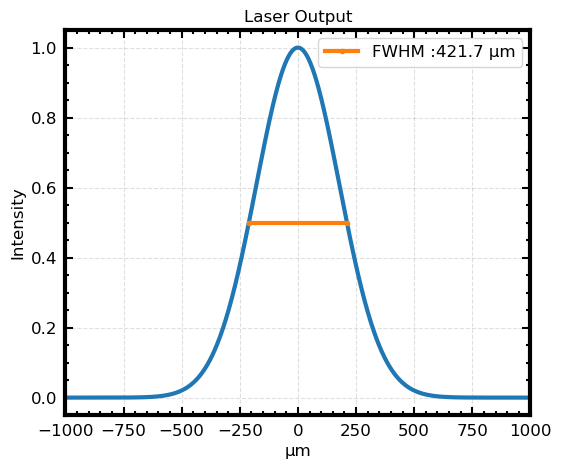

In [19]:
#Laser Output

laser_output = Scalar_source_X(x=range_of_second_lens, wavelength=wavelength)
laser_output.gauss_beam(A=1,x0=0,z0=0*mm, w0= w0 * mm,theta=0 * degrees) 

fwhm_incident_beam = FWHM1D(laser_output.x,laser_output.intensity(),has_draw= False)
plt.plot(laser_output.x,laser_output.intensity())

#FWHM LINE
x1, y1 = [-fwhm_incident_beam/2, fwhm_incident_beam/2], [max(np.abs(laser_output.u)**2)/2, max(np.abs(laser_output.u)**2)/2]
plt.plot(x1, y1, marker = '.',label="FWHM :" + str(fwhm_incident_beam)[:5]+ " µm")

plt.title("Laser Output")
plt.xlabel("µm")
plt.ylabel("Intensity")
plt.xlim(-1000,1000)
plt.legend()
plt.show()



## Without 50mm Lens Without 200 mm Lens

Good result: factor 2115.20


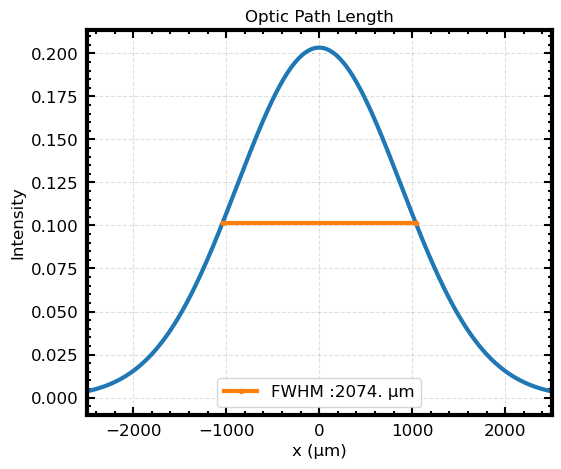

In [20]:

L_total=3068*mm

beam_L_total = laser_output.RS(z=L_total)
fwhm_beam_L_total = FWHM1D(beam_L_total.x,beam_L_total.intensity(),has_draw= False)


plt.plot(beam_L_total.x,beam_L_total.intensity())

#FWHM LINE
x1, y1 = [-fwhm_beam_L_total/2, fwhm_beam_L_total/2], [max(np.abs(beam_L_total.u)**2)/2, max(np.abs(beam_L_total.u)**2)/2]
plt.plot(x1, y1, marker = '.',label="FWHM :" + str(fwhm_beam_L_total)[:5]+ " µm")

plt.title("Optic Path Length")
plt.xlabel("x (µm)")
plt.ylabel("Intensity")
plt.xlim(-2500,2500)
plt.legend()

#Saving photo

file_name = "wout_50mm_lens_wout_200mm_lens_sim.txt"
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

plt.show()



## Before BS 

Good result: factor 1244.06


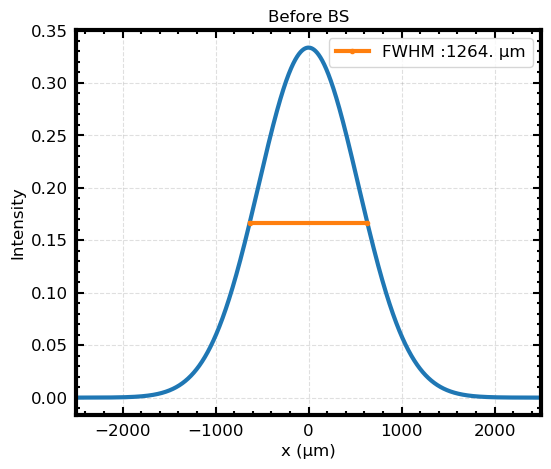

In [21]:
L1=1800*mm
beam_L = laser_output.RS(z=L1)
fwhm_beam_L = FWHM1D(beam_L.x,beam_L.intensity(),has_draw= False)


plt.plot(beam_L.x,beam_L.intensity())

#FWHM LINE
x1, y1 = [-fwhm_beam_L/2, fwhm_beam_L/2], [max(np.abs(beam_L.u)**2)/2, max(np.abs(beam_L.u)**2)/2]
plt.plot(x1, y1, marker = '.',label="FWHM :" + str(fwhm_beam_L)[:5]+ " µm")


plt.title("Before BS")
plt.xlabel("x (µm)")
plt.ylabel("Intensity")
plt.xlim(-2500,2500)
plt.legend()

#Saving Photo
file_name = "before_bs_sim.txt"
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

plt.show()



## At 50mm Lens

Good result: factor 1562.64


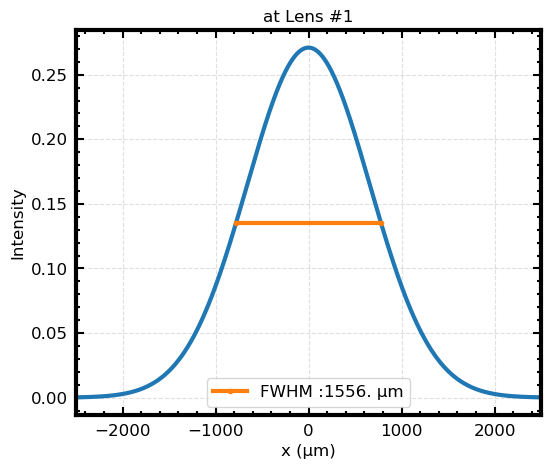

In [22]:
D1=363*mm
L2=100*mm

at_objective = laser_output.RS(z=L1+L2+D1)
fwhm_at_objective = FWHM1D(at_objective.x,at_objective.intensity(),has_draw= False)


plt.plot(at_objective.x,at_objective.intensity())

#FWHM LINE
x1, y1 = [-fwhm_at_objective/2, fwhm_at_objective/2], [max(np.abs(at_objective.u)**2)/2, max(np.abs(at_objective.u)**2)/2]
plt.plot(x1, y1, marker = '.',label="FWHM :" + str(fwhm_at_objective)[:5]+ " µm")

plt.title("at Lens #1")
plt.xlabel("x (µm)")
plt.ylabel("Intensity")
plt.xlim(-2500,2500)
plt.legend()

#Saving Photo
file_name = "at_50mm_lens_sim.txt"
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

plt.show()


### Figures for Different Locations

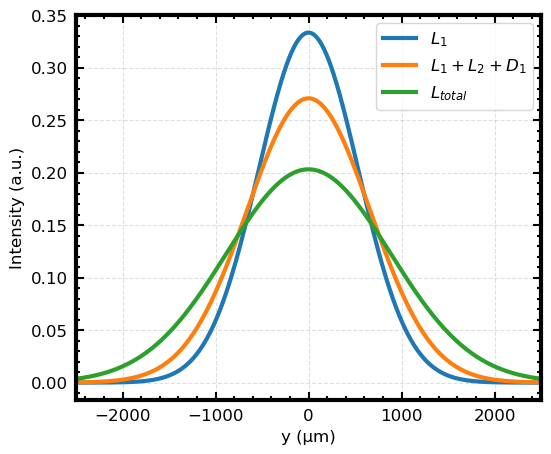

<Figure size 600x500 with 0 Axes>

In [23]:
plt.plot(beam_L.x,beam_L.intensity(),label=r'$L_{1}$')
plt.plot(at_objective.x,at_objective.intensity(),label=r'$L_{1}+L_{2}+D_{1}$')
plt.plot(beam_L_total.x,beam_L_total.intensity(),label=r'$L_{total}$')

plt.xlabel("y (µm)")
plt.ylabel("Intensity (a.u.)")
plt.xlim(-2500,2500)
plt.legend()
plt.show()
#Saving Photo
file_name = "diffrent locations.txt"
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

## Without 50mm lens with 200mm Lens 

In [24]:
fwhm_array_wout_first_lens = []
for i in np.arange(13,16,0.1):
    shift_in_focal_length_second_lens = i*mm

    beam_before_second_lens = laser_output.RS(z= L_total - focal_length_second_lens - shift_in_focal_length_second_lens,verbose=False)
    at_second_lens = beam_before_second_lens * second_lens
    without_first_lens = at_second_lens.RS(z= focal_length_second_lens + shift_in_focal_length_second_lens,verbose=False)
    fwhm_without_first_lens = FWHM1D(without_first_lens.x,without_first_lens.intensity(),has_draw= False)
    fwhm_array_wout_first_lens.append(fwhm_without_first_lens)
    


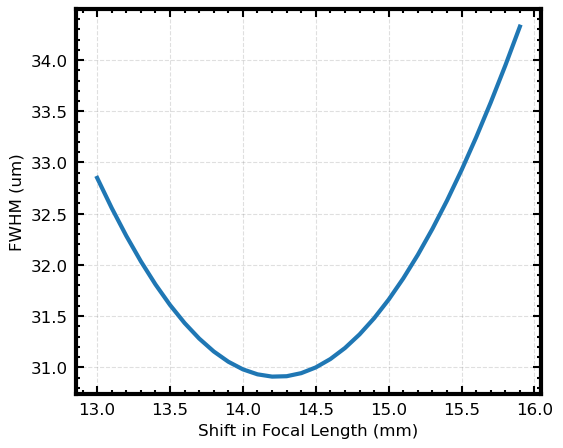

In [25]:
plt.plot(np.arange(13,16,0.1),fwhm_array_wout_first_lens)
plt.xlabel("Shift in Focal Length (mm)")
plt.ylabel("FWHM (um)")
plt.show()

In [26]:
min(fwhm_array_wout_first_lens)

30.90916672581625

Good result: factor 1968.27
Good result: factor 148.83


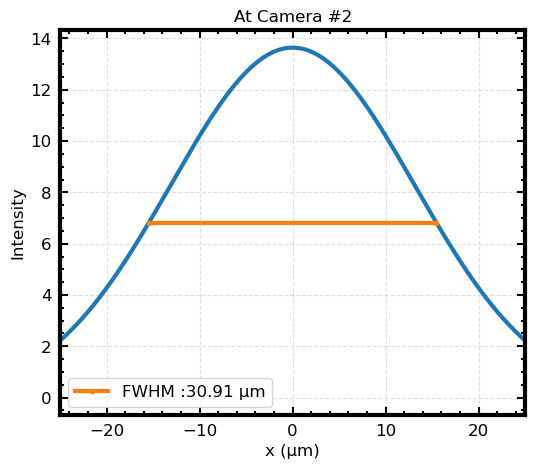

In [27]:


shift_in_focal_length_second_lens = 14.3*mm

beam_before_second_lens = laser_output.RS(z=L_total - focal_length_second_lens - shift_in_focal_length_second_lens)
at_second_lens = beam_before_second_lens * second_lens
without_first_lens = at_second_lens.RS(z= focal_length_second_lens + shift_in_focal_length_second_lens)
fwhm_without_first_lens = FWHM1D(without_first_lens.x,without_first_lens.intensity(),has_draw= False)


plt.plot(without_first_lens.x,without_first_lens.intensity())

#FWHM LINE
x1, y1 = [-fwhm_without_first_lens/2, fwhm_without_first_lens/2], [max(np.abs(without_first_lens.u)**2)/2, max(np.abs(without_first_lens.u)**2)/2]
plt.plot(x1, y1, marker = '.',label="FWHM :" + str(fwhm_without_first_lens)[:5]+ " µm")

plt.title("At Camera #2")
plt.xlabel("x (µm)")
plt.ylabel("Intensity")
plt.xlim(-25,25)
plt.legend()

#Saving Photo
file_name = "wout_50mm_lens_200mm_lens_sim.txt"
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

plt.show()

## After 50mm Lens

Good result: factor 1562.64
Good result: factor 36.39


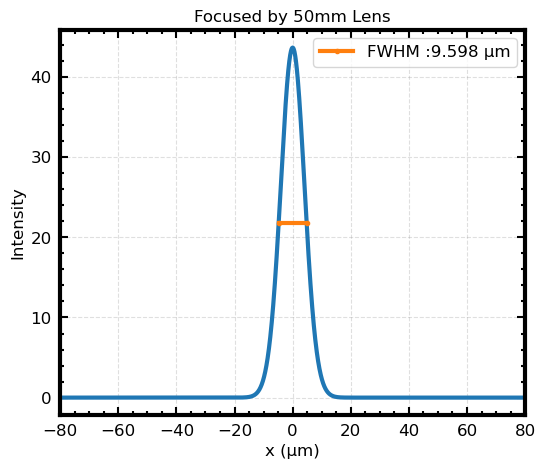

In [28]:
shift_in_focal_length_first_lens = 0.92*mm

at_objective = laser_output.RS(z=L1+L2+D1)
at_first_lens = at_objective * first_lens
at_focus_by_first_lens = at_first_lens.RS(z= focal_length_first_lens + shift_in_focal_length_first_lens)

fwhm_at_focus_by_first_lens = FWHM1D(at_focus_by_first_lens.x,at_focus_by_first_lens.intensity(),has_draw= False)


plt.plot(at_focus_by_first_lens.x,at_focus_by_first_lens.intensity())

#FWHM LINE
x1, y1 = [-fwhm_at_focus_by_first_lens/2, fwhm_at_focus_by_first_lens/2], [max(np.abs(at_focus_by_first_lens.u)**2)/2, max(np.abs(at_focus_by_first_lens.u)**2)/2]
plt.plot(x1, y1, marker = '.',label="FWHM :" + str(fwhm_at_focus_by_first_lens)[:5]+ " µm")

plt.title("Focused by 50mm Lens")
plt.xlabel("x (µm)")
plt.ylabel("Intensity")
plt.xlim(-80,80)
plt.legend()

#Saving Photo
file_name = "after_50mm_lens_sim.txt"
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

plt.show()

##  50mm Lens with 200mm Lens Sim

In [29]:


D2=L_total-L1-L2-2*(D1)-2*(focal_length_first_lens + shift_in_focal_length_first_lens)-(focal_length_second_lens + shift_in_focal_length_second_lens)

print("D2 = %.2f mm" % (D2/1000))
print("D1 = %.2f mm" % (D1/1000))

D2 = 125.86 mm
D1 = 363.00 mm


In [30]:
fwhm_array_second_lens = []
for i in np.arange(-0.1,0.1,0.01):
    shift_in_focal_length_first_lens = i*mm

    first_lens_2f = at_first_lens.RS(z=2*(focal_length_first_lens + shift_in_focal_length_first_lens ),verbose=False)
    first_lens_twice = first_lens_2f * first_lens


    before_second_lens = first_lens_twice.RS(z=D1+D2,verbose=False)
    at_second_lens = before_second_lens * second_lens
    after_second_lens = at_second_lens.RS(z=focal_length_second_lens + shift_in_focal_length_second_lens,verbose=False )

    fwhm_after_second_lens = FWHM1D(after_second_lens.x,after_second_lens.intensity(),has_draw= False)
    fwhm_array_second_lens.append(fwhm_after_second_lens)
    


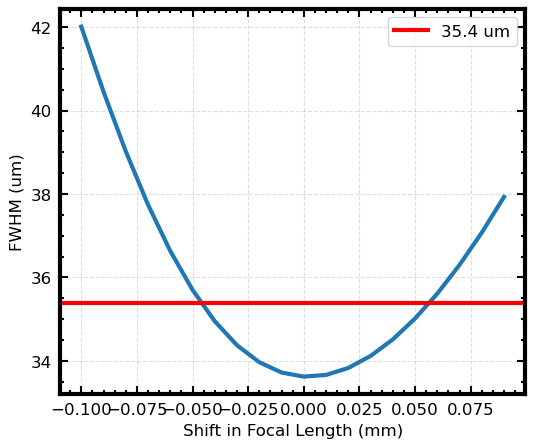

In [31]:
plt.plot(np.arange(-0.1,0.1,0.01),fwhm_array_second_lens)
plt.xlabel("Shift in Focal Length (mm)")
plt.ylabel("FWHM (um)")
plt.axhline(y=35.4,color="r",label="35.4 um")
plt.legend()
plt.show()


Good result: factor 69.83
Good result: factor 338.84
Good result: factor 148.83


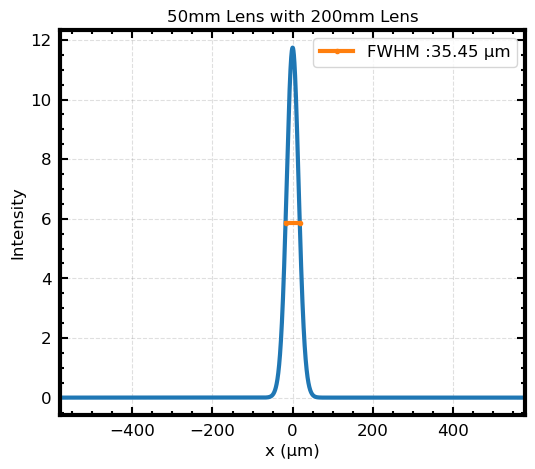

<Figure size 600x500 with 0 Axes>

In [32]:


shift_in_focal_length_first_lens = -0.047*mm

first_lens_2f = at_first_lens.RS(z=2*(focal_length_first_lens + shift_in_focal_length_first_lens ))

first_lens_twice = first_lens_2f * first_lens


before_second_lens = first_lens_twice.RS(z=D1+D2)
at_second_lens = before_second_lens * second_lens
after_second_lens = at_second_lens.RS(z=focal_length_second_lens + shift_in_focal_length_second_lens )

fwhm_after_second_lens = FWHM1D(after_second_lens.x,after_second_lens.intensity(),has_draw= False)


plt.plot(after_second_lens.x,after_second_lens.intensity())

#FWHM LINE
x1, y1 = [-fwhm_after_second_lens/2, fwhm_after_second_lens/2], [max(np.abs(after_second_lens.u)**2)/2, max(np.abs(after_second_lens.u)**2)/2]
plt.plot(x1, y1, marker = '.',label="FWHM :" + str(fwhm_after_second_lens)[:5]+ " µm")

plt.title("50mm Lens with 200mm Lens")
plt.xlabel("x (µm)")
plt.ylabel("Intensity")
plt.xlim(-580,580)
plt.legend()
plt.show()

#Saving Photo
file_name = "50mm_lens_200mm_lens_sim.txt"
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')









## 50mm Lens without 200mm Lens

Good result: factor 487.09


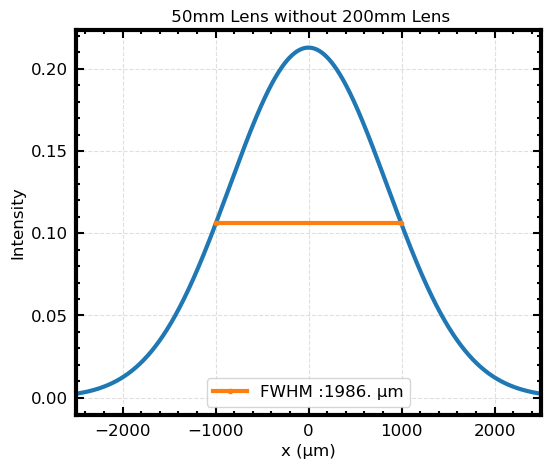

In [33]:
offset = 0*mm

first_lens_without_lens = first_lens_twice.RS(z=D1 + D2 + focal_length_second_lens + shift_in_focal_length_second_lens + offset)

fwhm_obj_without_second_lens_focus = FWHM1D(first_lens_without_lens.x,first_lens_without_lens.intensity(),has_draw= False)

plt.plot(first_lens_without_lens.x,first_lens_without_lens.intensity())

#FWHM LINE
x1, y1 = [-fwhm_obj_without_second_lens_focus/2, fwhm_obj_without_second_lens_focus/2], [max(np.abs(first_lens_without_lens.u)**2)/2, max(np.abs(first_lens_without_lens.u)**2)/2]
plt.plot(x1, y1, marker = '.',label="FWHM :" + str(fwhm_obj_without_second_lens_focus)[:5]+ " µm")

plt.title("50mm Lens without 200mm Lens")
plt.xlabel("x (µm)")
plt.ylabel("Intensity")
plt.xlim(-2500,2500)
plt.legend()

#Saving Photo
file_name = "50mm_lens_wout_200mm_lens_sim.txt"
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

plt.show()
